In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_origin = pd.read_excel('aima.xlsx', engine='openpyxl')

In [3]:
# Taking only Location, Time and Reason
df_minified = df_origin.iloc[:, [0, 3, 4]]

# Rename columns
df_minified.columns = ['Reason', 'Location', 'Time']
df_minified = df_minified.dropna()

# Check for null values in each column
null_values = df_minified.isnull().sum()

# Display the number of null values in each column
print(null_values)

df = df_minified.copy()

Reason      0
Location    0
Time        0
dtype: int64


In [6]:
# display df information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 1 to 733
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reason    733 non-null    object 
 1   Location  733 non-null    object 
 2   Time      733 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.9+ KB


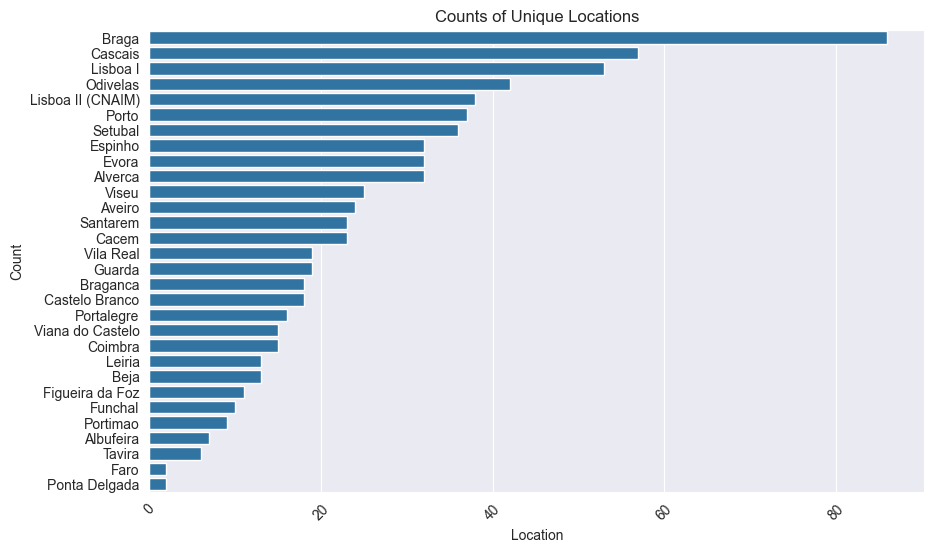

In [7]:
# Count unique locations and sort them
location_counts = df['Location'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title('Counts of Unique Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Get unique reasons and sort them
unique_locations = sorted(df['Reason'].unique())

# Create a DataFrame for better display
unique_locations_df = pd.DataFrame(unique_locations, columns=['Unique Reasons:'])
print(unique_locations_df)

                           Unique Reasons:
0    122K (Воссоединение с ребенком с ВНЖ)
1      15 (Воссоединение с гражданином ЕС)
2         90.2 (Контракт НЕ португальский)
3            90.2 (Контракт португальский)
4                91 Учеба (институт/курсы)
5                               92 (Школа)
6                     98.2 (Воссоединение)
7   D2 (Independent Professional Activity)
8                    D3 (Highly Qualified)
9                               D4 (Учеба)
10                 D6 (98.1 Воссоединение)
11                                      D7
12                     DR (Digital Nomads)
13                            Manifestação
14                                 Стартап


Unique Time Intervals and Counts:
Time_Interval
0-50       230
51-100     191
101-150    141
151-200     92
201-250     54
251-300     14
301-350      1
351-400      2
401-450      4
451-500      3
501-600      1
Name: count, dtype: int64


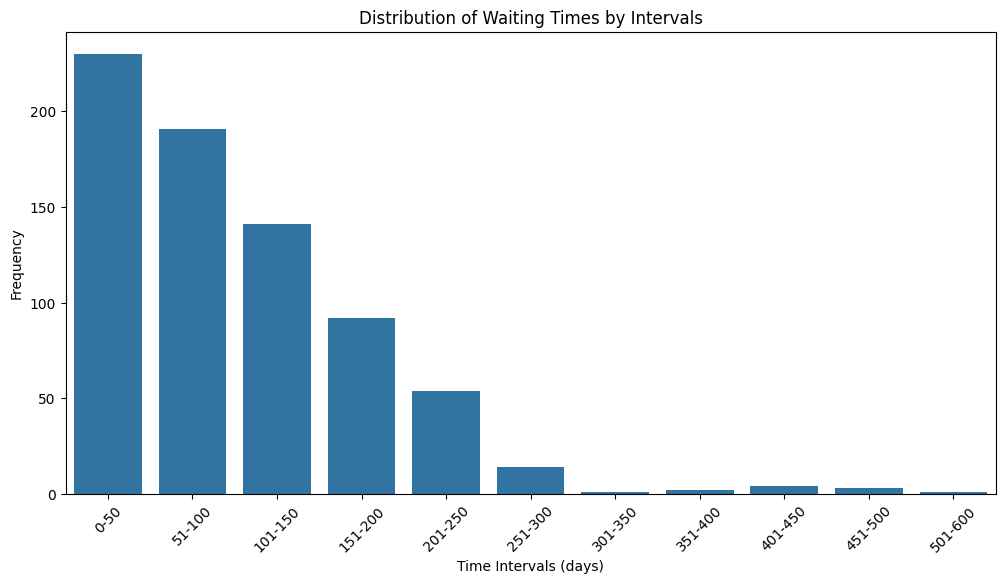

In [36]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-600']

# Create a new column for the binned intervals
df['Time_Interval'] = pd.cut(df['Time'], bins=bins, labels=labels, right=False)

# Display unique intervals and their counts
interval_counts = df['Time_Interval'].value_counts().sort_index()
print("Unique Time Intervals and Counts:")
print(interval_counts)

# Bar plot of the intervals
plt.figure(figsize=(12, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, palette="viridis")
plt.title('Distribution of Waiting Times by Intervals')
plt.xlabel('Time Intervals (days)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

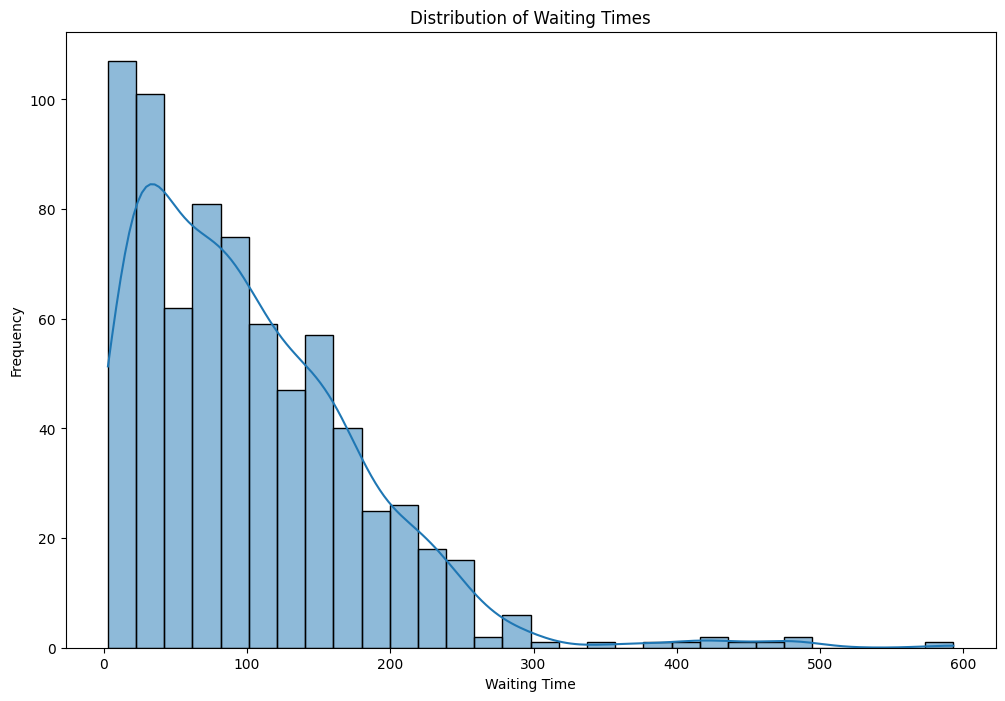

In [48]:
# Histogram and KDE plot for waiting times
plt.figure(figsize=(12, 8))
sns.histplot(df['Time'], kde=True, bins=30)
plt.title('Distribution of Waiting Times')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Summary statistics for waiting times
summary_stats = df['Time'].describe()
print("Summary Statistics for Waiting Times:")
print(summary_stats)

Summary Statistics for Waiting Times:
count    733.000000
mean     100.549795
std       78.889435
min        3.000000
25%       38.000000
50%       87.000000
75%      146.000000
max      593.000000
Name: Time, dtype: float64


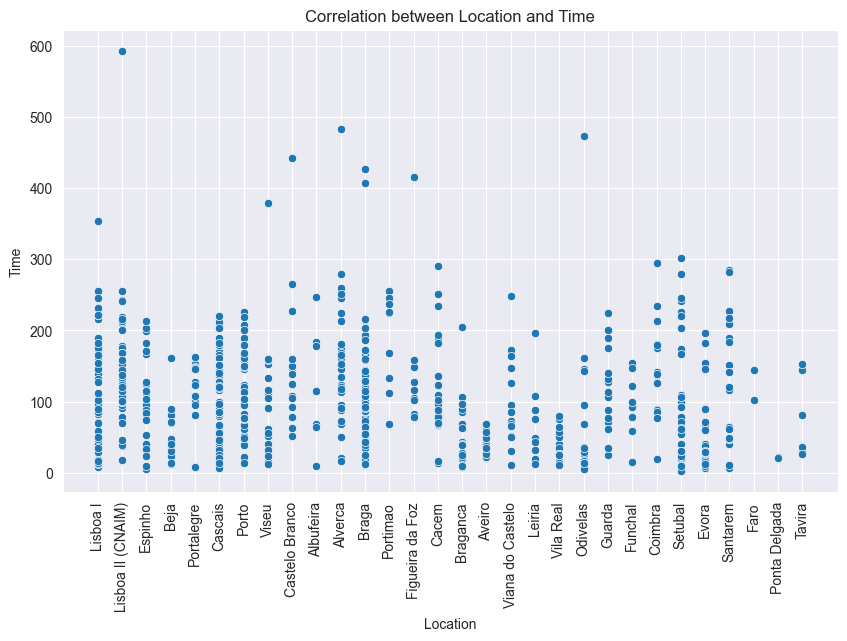

In [9]:
# Ensure 'Time' is numeric for the scatter plot; convert if necessary
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# Scatter plot to show correlation between location and time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Location', y='Time')
plt.xticks(rotation=90)  # Rotate labels if they overlap
plt.title('Correlation between Location and Time')
plt.show()

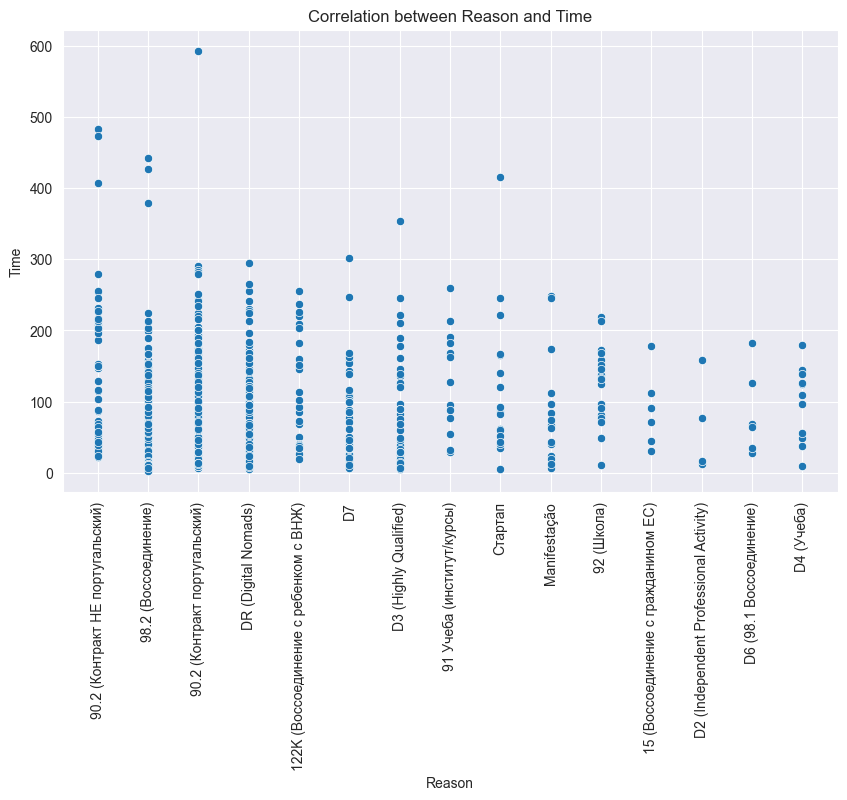

In [10]:
# Scatter plot to show correlation between location and Reason
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reason', y='Time')
plt.xticks(rotation=90)  # Rotate labels if they overlap
plt.title('Correlation between Reason and Time')
plt.show()

In [25]:
# Summary statistics for 'Time' by 'Location'
location_summary = df.groupby('Location')['Time'].describe()
print(location_summary)

# Summary statistics for 'Time' by 'Reason'
reason_summary = df.groupby('Reason')['Time'].describe()
print(reason_summary)

                   count        mean         std    min     25%    50%  \
Location                                                                 
Albufeira            7.0  124.000000   82.893506   10.0   67.00  115.0   
Alverca             32.0  167.781250  106.703307   16.0  108.75  150.5   
Aveiro              24.0   39.250000   15.385623   21.0   26.00   35.0   
Beja                13.0   54.000000   41.140005   13.0   24.00   41.0   
Braga               86.0  103.802326   72.205722   13.0   54.00   91.0   
Braganca            18.0   55.444444   48.727601    8.0   22.75   40.0   
Cacem               23.0  118.478261   72.153794   14.0   74.00   92.0   
Cascais             57.0   88.070175   58.730577    7.0   45.00   81.0   
Castelo Branco      18.0  145.277778   91.567915   52.0   95.25  125.0   
Coimbra             15.0  145.466667   70.523417   19.0   89.00  139.0   
Espinho             32.0   93.031250   57.835966    6.0   41.00   87.5   
Evora               32.0   52.406250  

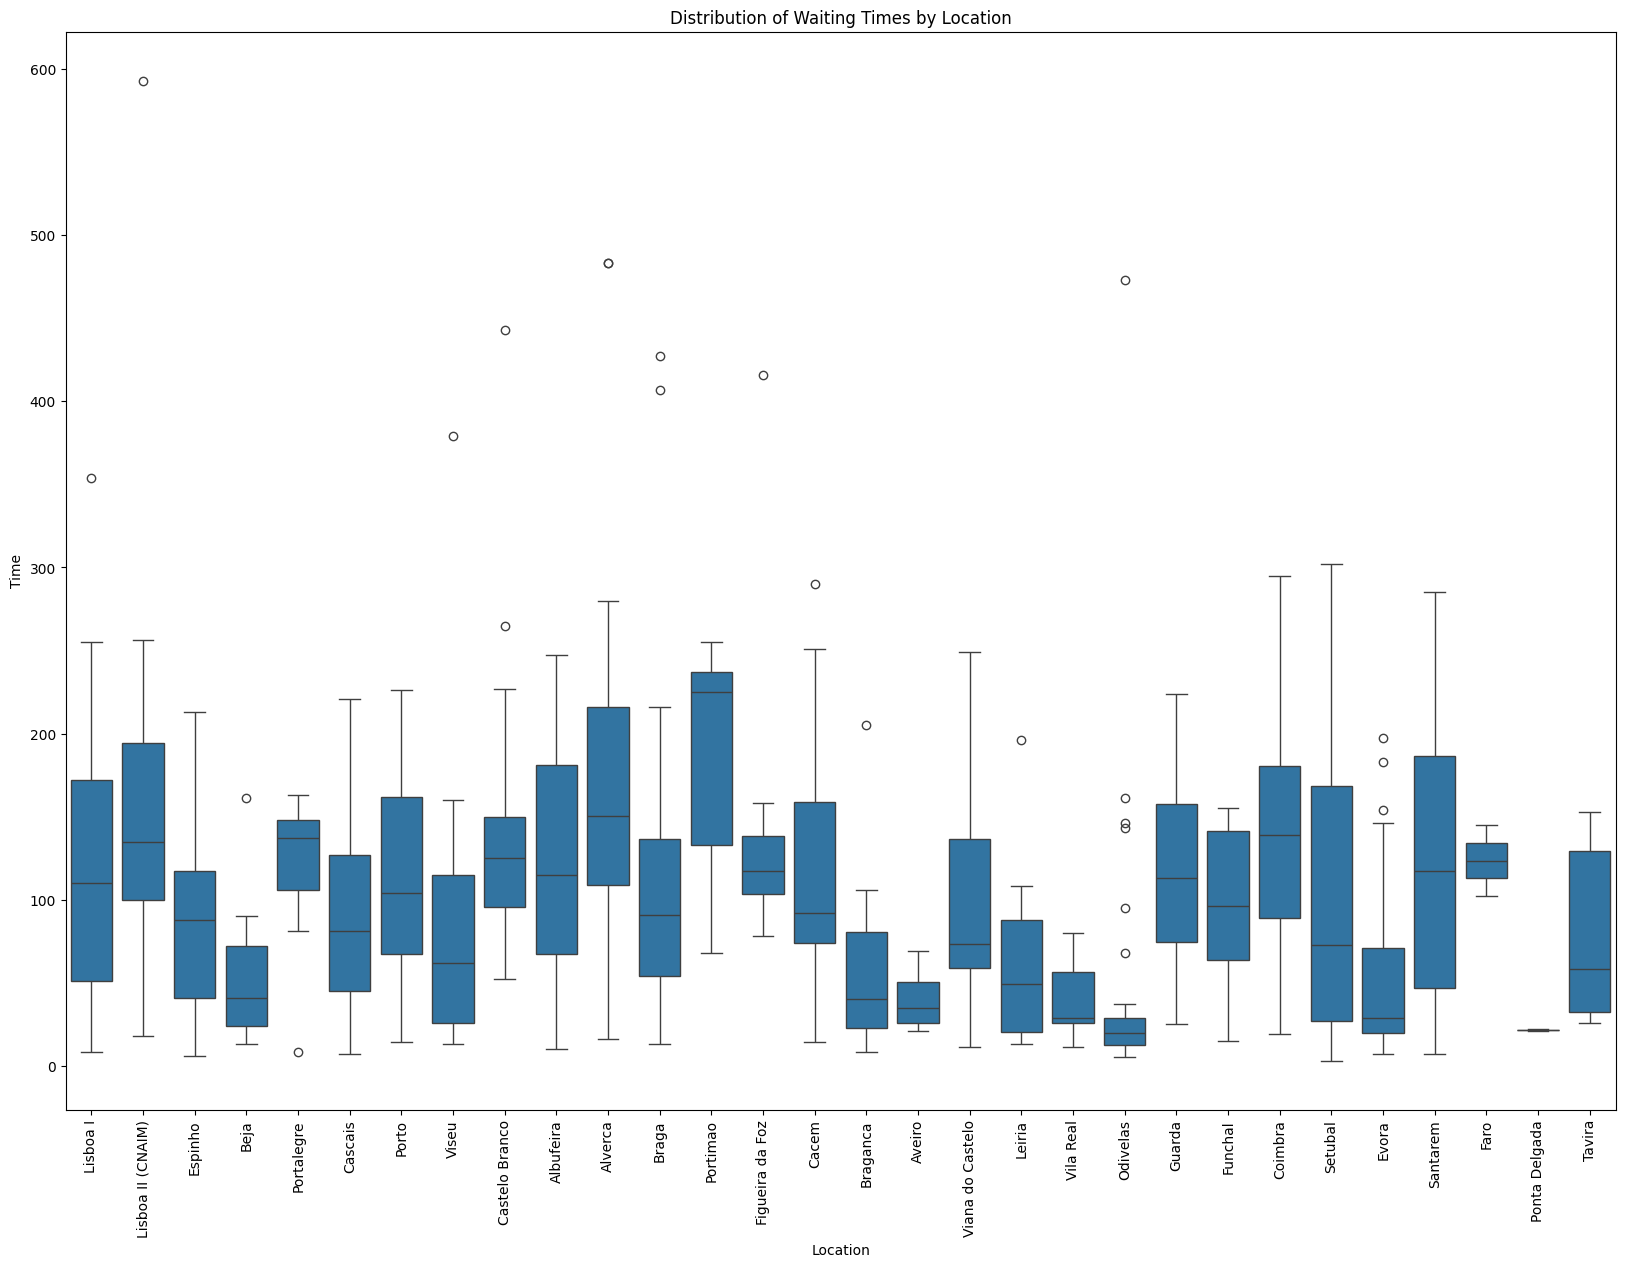

In [26]:
# Box plot of waiting times by location
plt.figure(figsize=(20, 14))
sns.boxplot(x='Location', y='Time', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Waiting Times by Location')
plt.show()

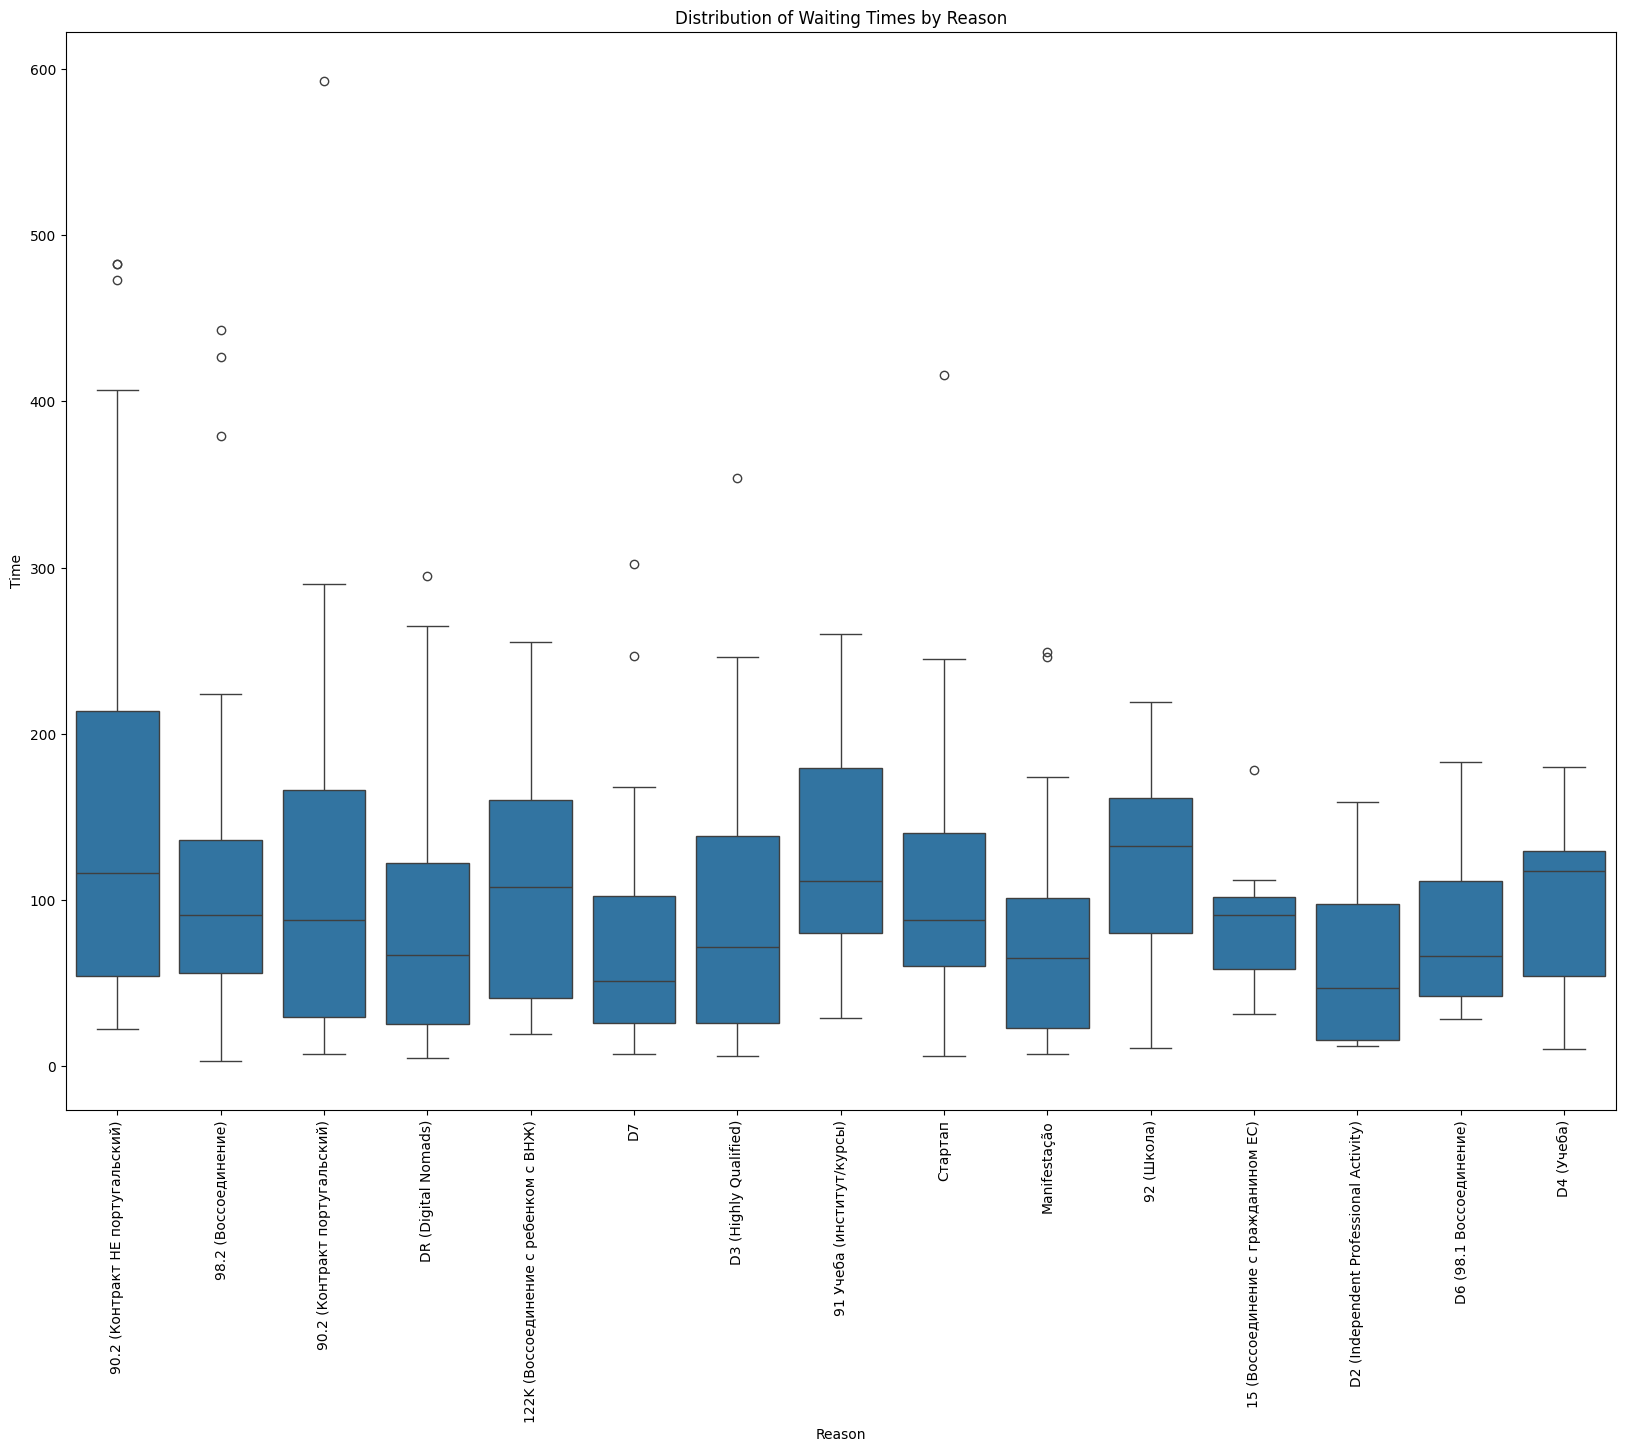

In [27]:

# Box plot of waiting times by reason
plt.figure(figsize=(20, 14))
sns.boxplot(x='Reason', y='Time', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Waiting Times by Reason')
plt.show()

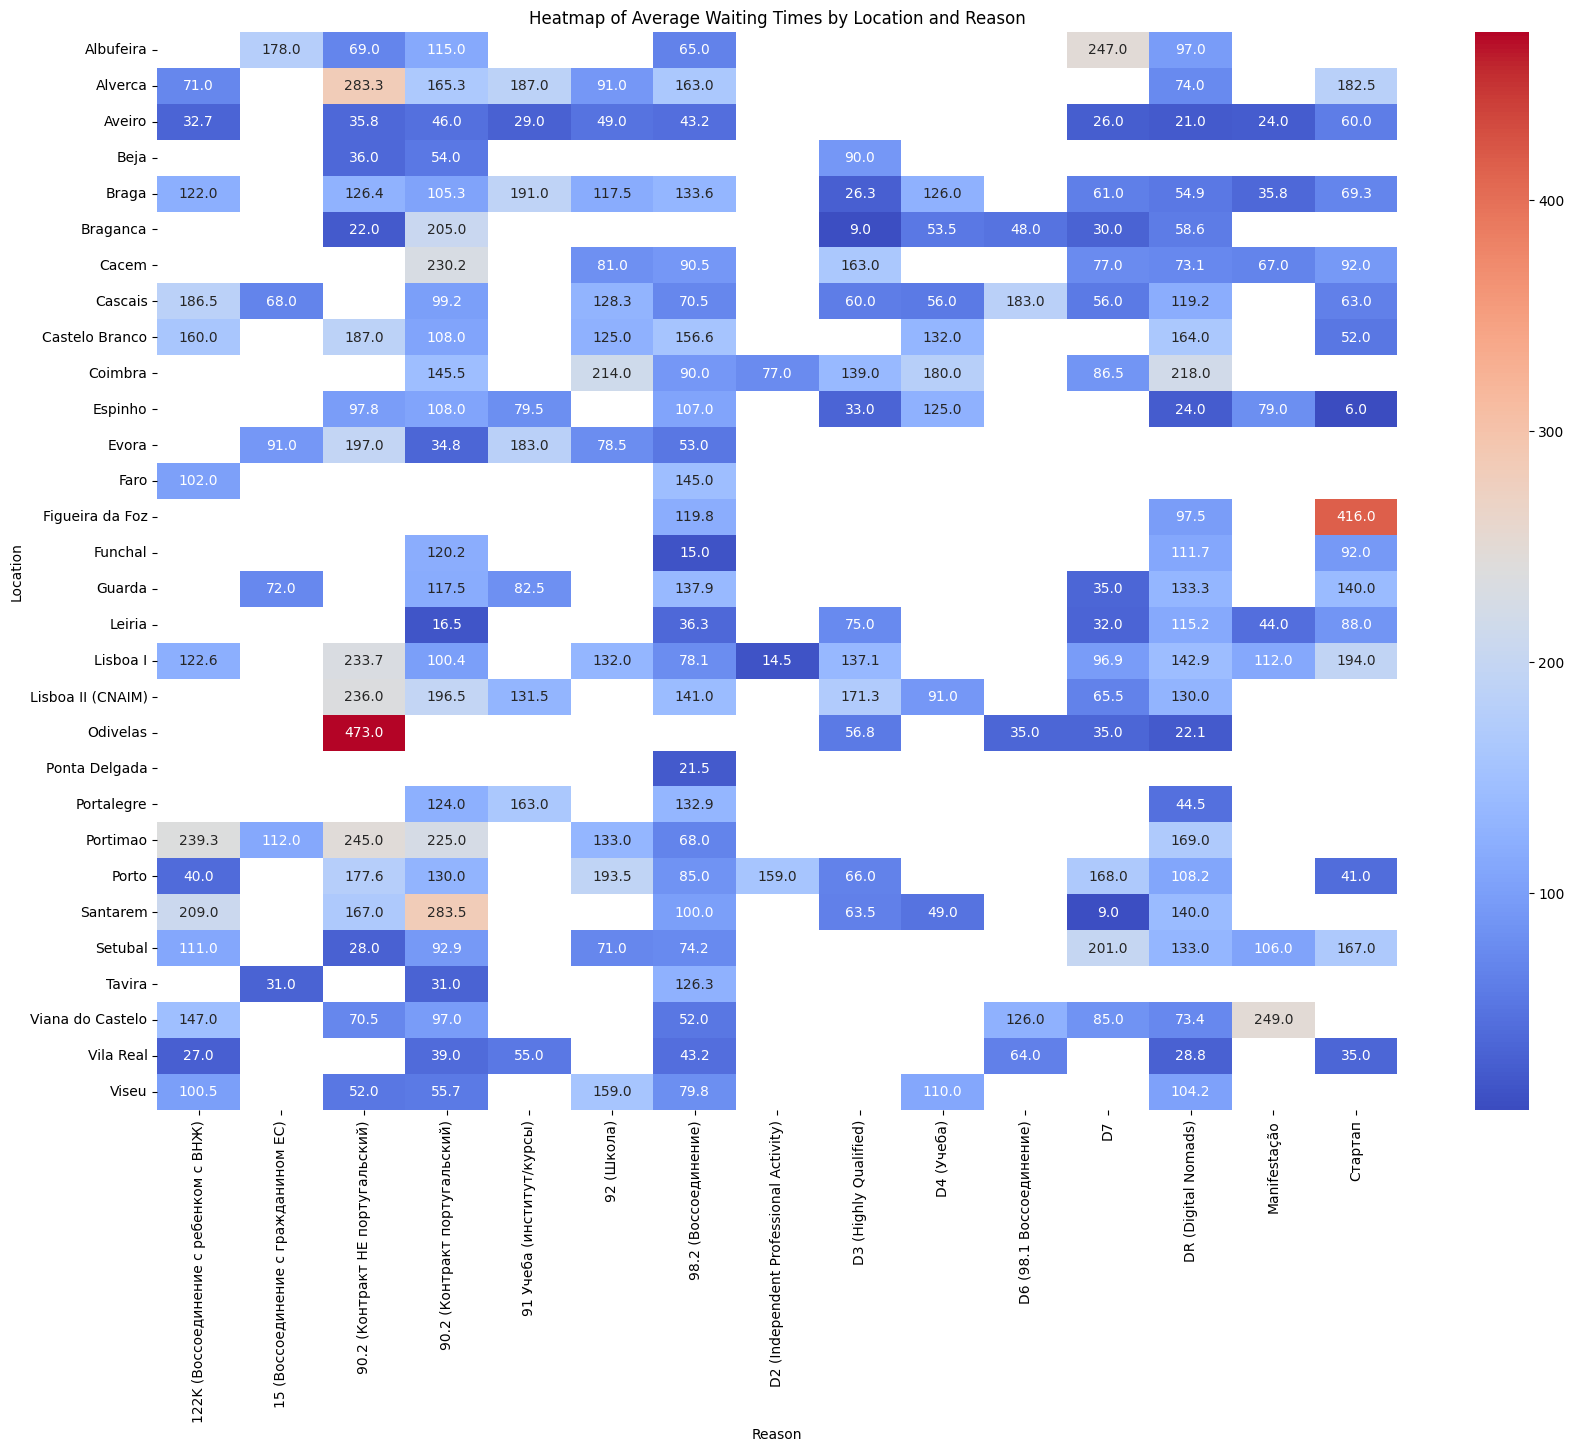

In [49]:
# Heatmap of average waiting times

pivot_table = df.pivot_table(values='Time', index='Location', columns='Reason', aggfunc='mean')
plt.figure(figsize=(20, 14))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Heatmap of Average Waiting Times by Location and Reason')
plt.show()

In [51]:
df = df_minified.copy()

# Longest waiting times
longest_waits = df.nlargest(10, 'Time')
print("Top 10 Longest Waiting Times:")
print(longest_waits)

# Shortest waiting times
shortest_waits = df.nsmallest(10, 'Time')
print("Top 10 Shortest Waiting Times:")
print(shortest_waits)


Top 10 Longest Waiting Times:
                               Reason           Location   Time
111     90.2 (Контракт португальский)  Lisboa II (CNAIM)  593.0
398  90.2 (Контракт НЕ португальский)            Alverca  483.0
409  90.2 (Контракт НЕ португальский)            Alverca  483.0
665  90.2 (Контракт НЕ португальский)           Odivelas  473.0
192              98.2 (Воссоединение)     Castelo Branco  443.0
279              98.2 (Воссоединение)              Braga  427.0
588                           Стартап    Figueira da Foz  416.0
322  90.2 (Контракт НЕ португальский)              Braga  407.0
619              98.2 (Воссоединение)              Viseu  379.0
191             D3 (Highly Qualified)           Lisboa I  354.0
Top 10 Shortest Waiting Times:
                            Reason  Location  Time
487           98.2 (Воссоединение)   Setubal   3.0
622            DR (Digital Nomads)  Odivelas   5.0
464          D3 (Highly Qualified)  Odivelas   6.0
684                        Стар

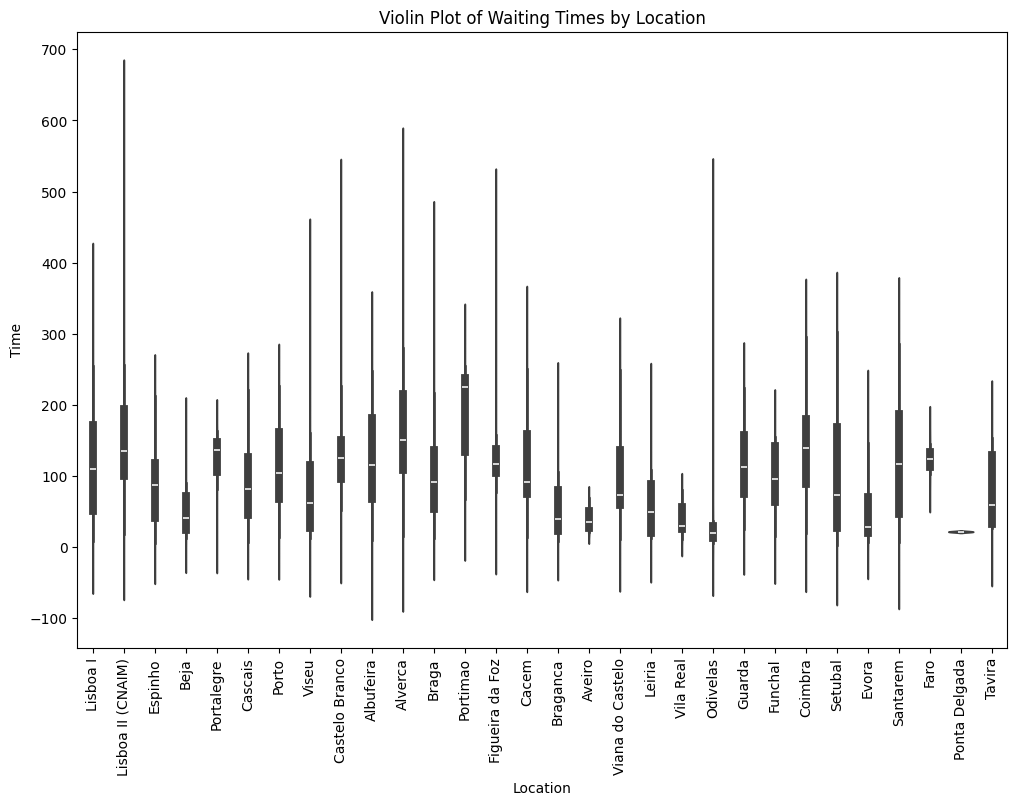

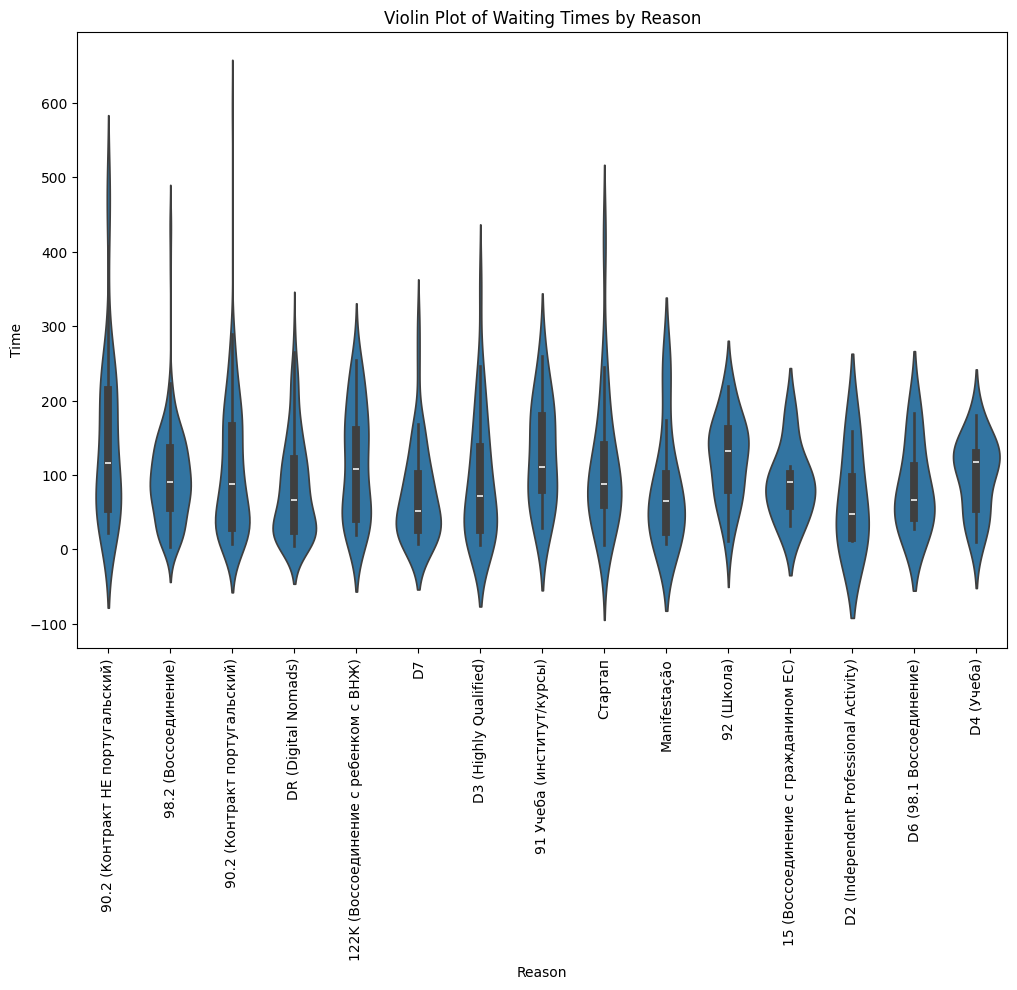

In [31]:
# Violin plot for waiting times by location
plt.figure(figsize=(12, 8))
sns.violinplot(x='Location', y='Time', data=df)
plt.xticks(rotation=90)
plt.title('Violin Plot of Waiting Times by Location')
plt.show()

# Violin plot for waiting times by reason
plt.figure(figsize=(12, 8))
sns.violinplot(x='Reason', y='Time', data=df)
plt.xticks(rotation=90)
plt.title('Violin Plot of Waiting Times by Reason')
plt.show()

In [11]:
# lets analyze only 90.2 (Контракт НЕ португальский)  Reason

Summary Statistics for Waiting Times (90.2 Контракт НЕ португальский):
count     60.000000
mean     145.950000
std      113.596435
min       22.000000
25%       54.000000
50%      116.000000
75%      213.500000
max      483.000000
Name: Time, dtype: float64


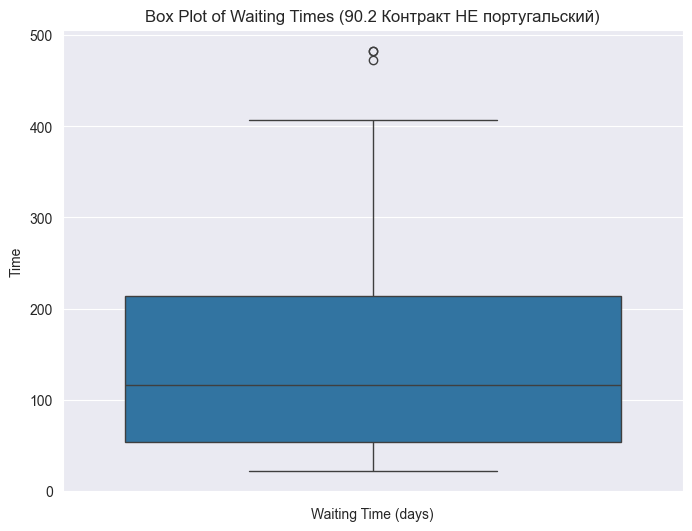

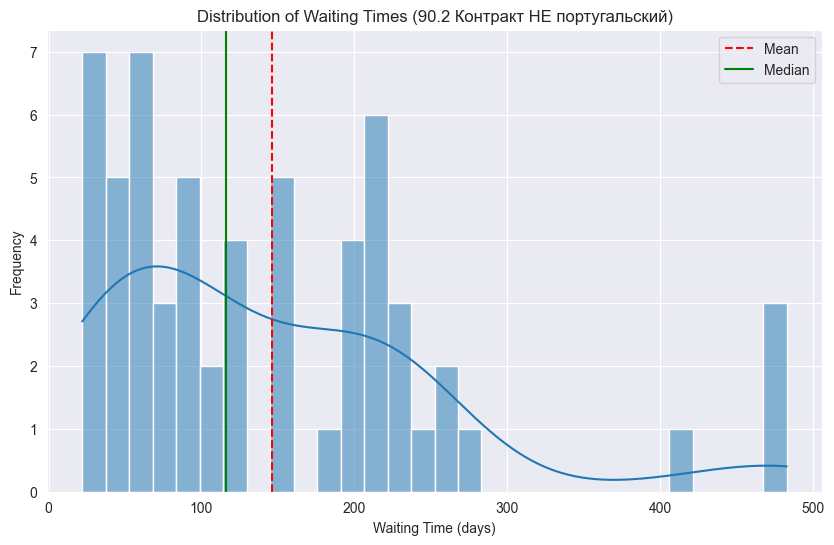

In [12]:
# Filter the DataFrame for the specific reason - 90.2 (Контракт НЕ португальский) 
filtered_df = df[df['Reason'] == '90.2 (Контракт НЕ португальский)']

# Summary statistics for the filtered data
summary_stats = filtered_df['Time'].describe()
print("Summary Statistics for Waiting Times (90.2 Контракт НЕ португальский):")
print(summary_stats)

# Box plot for waiting times for the specific reason
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_df['Time'])
plt.title('Box Plot of Waiting Times (90.2 Контракт НЕ португальский)')
plt.xlabel('Waiting Time (days)')
plt.show()

# Histogram and KDE plot for waiting times for the specific reason
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Time'], kde=True, bins=30)
plt.title('Distribution of Waiting Times (90.2 Контракт НЕ португальский)')
plt.xlabel('Waiting Time (days)')
plt.ylabel('Frequency')
plt.axvline(filtered_df['Time'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(filtered_df['Time'].median(), color='g', linestyle='-', label='Median')
plt.legend()
plt.show()